# Customer Segmentation Using Kmeans Clustering

In [1]:
#Import 

import pandas as pd#.............................      (use for csv file)
import matplotlib.pyplot as plt   #use for data vasulation 
import numpy as np  #...................................(use for algebric equation)
import seaborn as sns 
from sklearn.preprocessing import StandardScaler#....(use for machine learning )
from scipy.stats import skew #.....................(use for visulation af data)
# form utility import check_missing_value ........(use for industrail project) 


import warnings 
warnings.filterwarnings("ignore")#....................(ignore filterwarning)

%matplotlib inline 


In [2]:
# Read data into a DatafRAME

df= pd.read_csv('DATA/Mall_Customers.csv',index_col=0,header=0)#...........(Import CSV file)
df.head(15)#...................................................(1st 15 recored)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


Text(0.5, 1.0, 'count plot for male and Female')

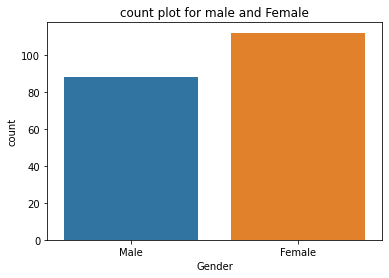

In [3]:
sns.countplot(x="Gender",data=df)
plt.title("count plot for male and Female")

### Above count plot we can said that male count is approx 85-90 and female count is approx 110-115 heance we conculding that number of female is more than male customer 



In [4]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

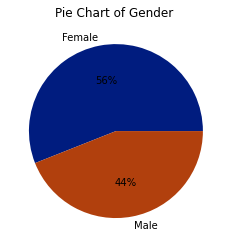

In [5]:
# Declaring data
data = [112, 88]  # Two data points representing Female and Male counts

keys = ["Female", "Male"]  # Labels for the pie chart

# Declaring and color pie chart
palette_color = sns.color_palette("dark")  # Color palette for the pie chart

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')  # Creating the pie chart
plt.title("Pie Chart of Gender ")
plt.show()  # Displaying the pie chart

### According to above pie chart given data shows 56% female customer and 44% male customer in data hence we can said that female costomer are more than male customer 

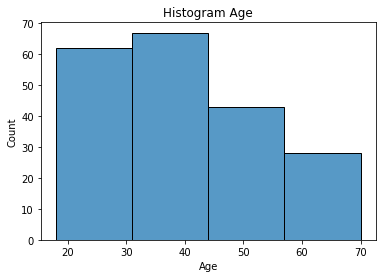

In [6]:
#Plot histogram 
sns.histplot(data=df,
             x="Age",
             kde=False,
             bins=4)
plt.title("Histogram Age")
plt.show()

### As above histogram shows that Age group of 20 to 45 are more than other age group 

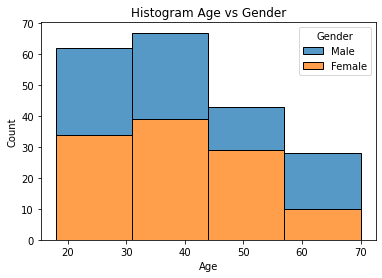

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram
sns.histplot(data=df, x="Age", multiple="stack",hue="Gender" , bins=4)
plt.title("Histogram Age vs Gender")
plt.show()

### above shows that age group of 20 to 45 are more female 

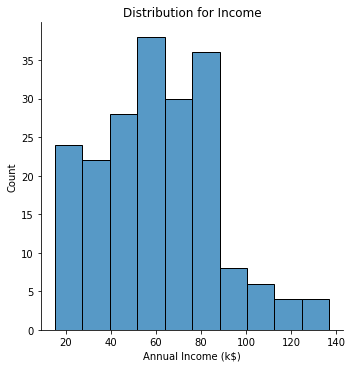

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a distribution plot
sns.displot(df, x="Annual Income (k$)")

# Setting the title for the plot
plt.title("Distribution for Income")

# Displaying the plot
plt.show()


### As Distribuation of income are show that most of people is  40 to 85 verey few people having income above k$100

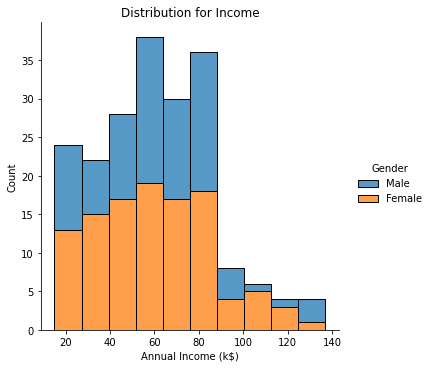

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a distribution plot
sns.displot(df, x="Annual Income (k$)",hue="Gender", multiple="stack")

# Setting the title for the plot
plt.title("Distribution for Income")

# Displaying the plot
plt.show()


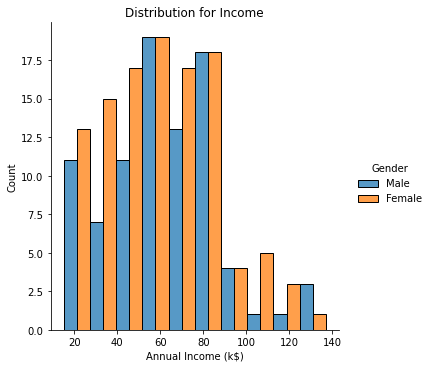

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a distribution plot
sns.displot(df, x="Annual Income (k$)",hue="Gender", multiple="dodge")

# Setting the title for the plot
plt.title("Distribution for Income")

# Displaying the plot
plt.show()


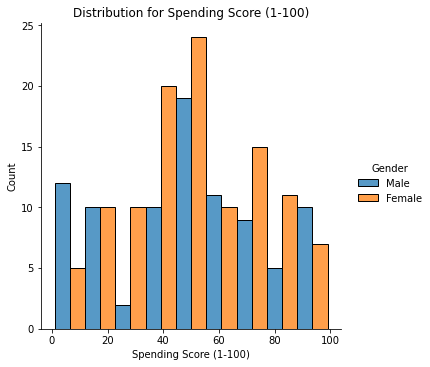

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a distribution plot
sns.displot(df, x="Spending Score (1-100)",hue="Gender", multiple="dodge")

# Setting the title for the plot
plt.title("Distribution for Spending Score (1-100)")

# Displaying the plot
plt.show()


## above shows that female customer spend more than male customer maximum spendng score are more than 20-25 female  

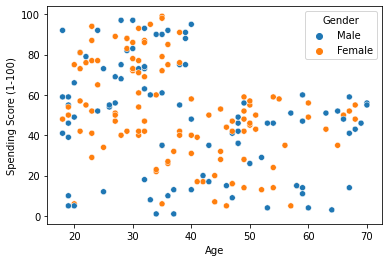

In [12]:
sns.scatterplot(data=df,x="Age",y="Spending Score (1-100)",hue="Gender")
plt.show()

## no relation between age and spending score according to scatter plot and we did not get any pattern 

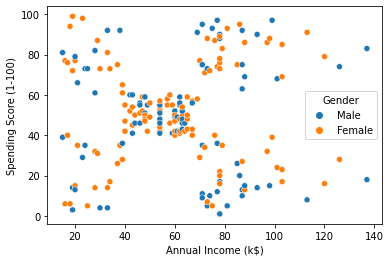

In [13]:
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)",hue="Gender")
plt.show()

### May be above scatter plot having approx 5 cluster and having some relation between annual income (k$) and speending score 

## Step 4 : Data Preprocessingmm

In [14]:
print(df.shape)
print(df.info())
print(df.isnull().sum())


(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.9+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [15]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


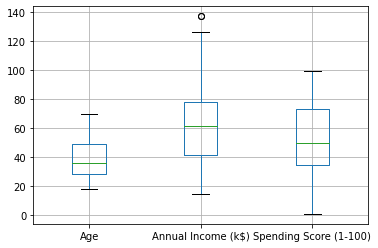

In [16]:
df.boxplot()
plt.show()

<AxesSubplot:>

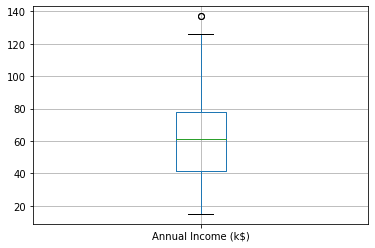

In [17]:
df.boxplot("Annual Income (k$)")

In [18]:
X= df.iloc[: ,2:4]

In [19]:
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [22]:
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

K_MAX=14
wsse=[]

with tqdm(total=K_MAX-1) as pbar:
    
    for i in range(1,K_MAX):
        
        
        kmeans = KMeans(n_clusters=i, random_state=10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)
                    

  0%|          | 0/13 [00:00<?, ?it/s]

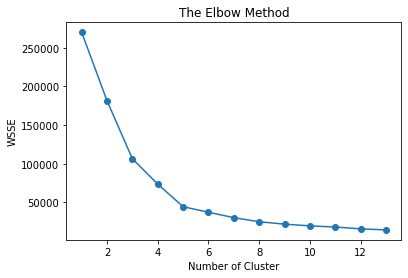

In [23]:
plt.plot(range(1,K_MAX),wsse)
plt.scatter (range(1, K_MAX),wsse)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WSSE")
plt.show()
         

In [24]:
print(wsse[4])

44448.45544793371


In [27]:
## Fitting K-Mean to the data base 

kmeans = KMeans (n_clusters=5,random_state=10)
Y_pred = kmeans.fit_predict(X)

In [28]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [29]:
kmeans.n_iter_

5

In [30]:
df["Clusters"]=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
6,Female,22,17,76,0
7,Female,35,18,6,3
8,Female,23,18,94,0
9,Male,64,19,3,3


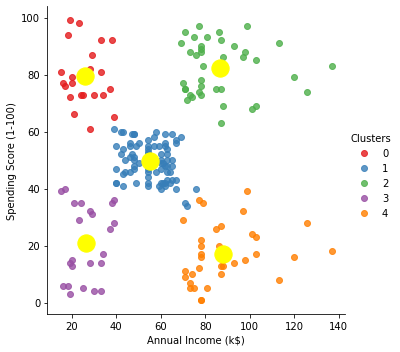

In [36]:
sns.lmplot(data=df,
           x="Annual Income (k$)",
           y= "Spending Score (1-100)",
           fit_reg=False,
           hue="Clusters",
           palette="Set1")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300 , c="yellow")
plt.show()

In [41]:
df["Clusters"]=df.Clusters.map({0:"Careless",1:"Sensible",2:"Target",3:"Notuseful",4:"careful"})

In [42]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Notuseful
2,Male,21,15,81,Careless
3,Female,20,16,6,Notuseful
4,Female,23,16,77,Careless
5,Female,31,17,40,Notuseful
